<a href="https://colab.research.google.com/github/begumpoly/Covid-with-Diabetes/blob/main/goldenglobeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>Golden Globe Awards: A Data-Driven Analysis (1944–2020)</center>

<center>Rabea Begum</center>


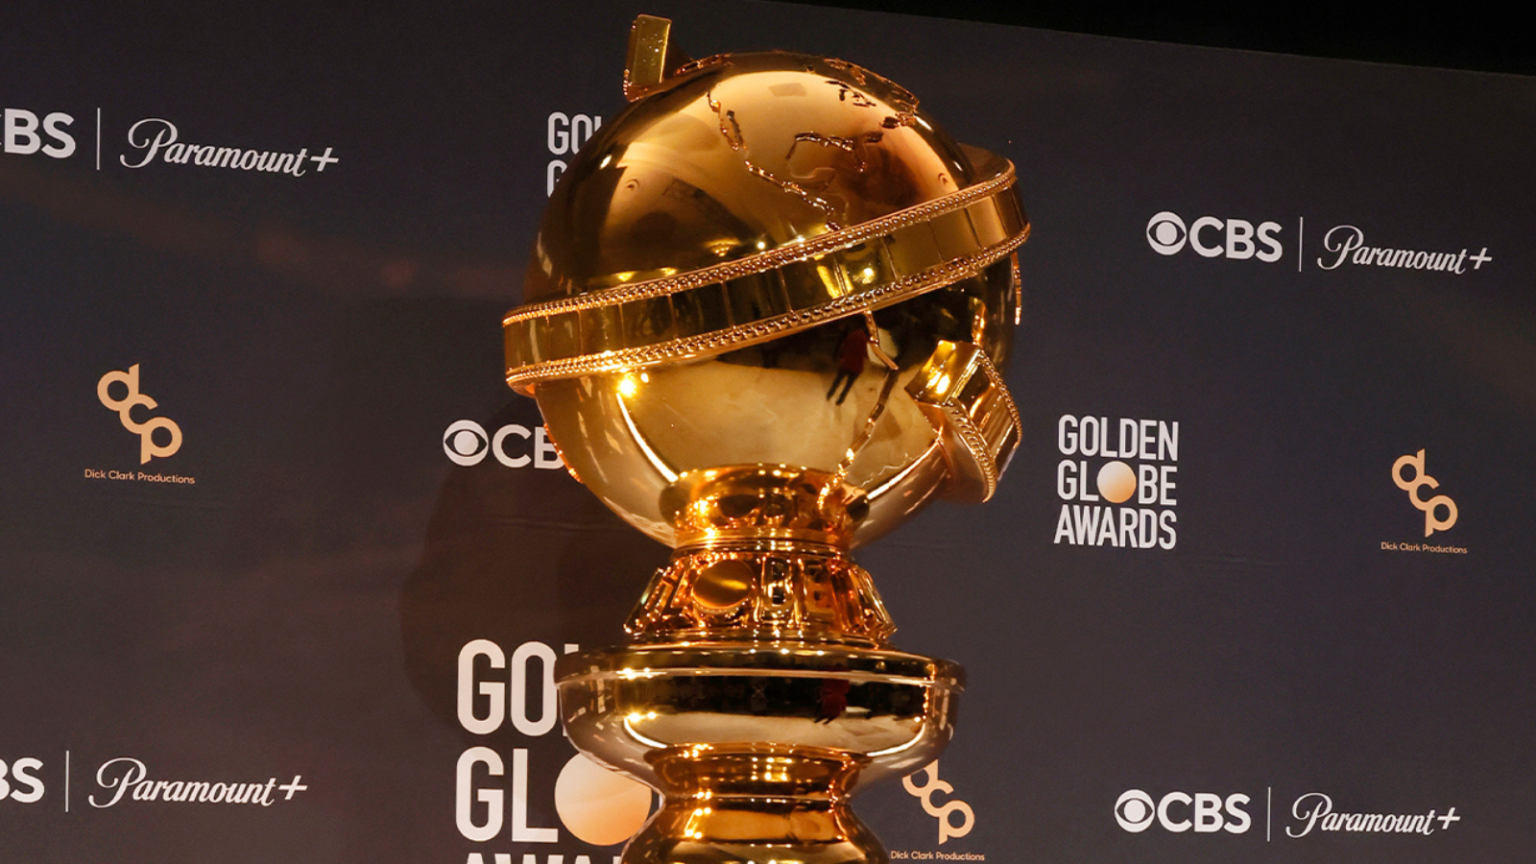

![Golden Globe Awards](image_url)  
**Kevin Winter/Getty Images (2025). The 82nd Annual Golden Globe Awards, Los Angeles, California. January 5, 2025.**


This analysis applies Exploratory Data Analysis (EDA) in Python to examine historical trends in the Golden Globe Awards dataset. Before diving into insights, we perform data cleaning to handle missing values, format inconsistencies, and remove duplicates, ensuring accuracy. By leveraging powerful libraries like pandas, NumPy, Matplotlib, and Seaborn, we examine key variables such as year, category, nominee, film, and win status to uncover statistical patterns. Through visualization and data-driven insights, we aim to identify recurring winners, shifts in genre dominance, and potential systemic biases in award selections.



Data Collection & Exploration

In [6]:
import pandas as pd # pandas library for data manipulation and analyzation.
import matplotlib.pyplot as plt # pyplot module from matplotlib for creating plots and visualizations.
import seaborn as sns # seaborn library, based on matplotlib and provides a high-level interface for drawing attractive statistical graphics.
import plotly.figure_factory as ff # figure_factory module from the plotly library, create specific types of figures, commonly aliased as 'ff'.
from IPython.display import display, HTML # display and HTML functions from IPython.
import plotly.express as px # express module from the plotly library, a high-level API for quickly creating plotly figures, commonly aliased as 'px'.
import plotly.graph_objects as go # Import the graph_objects module from the plotly library, the lower-level API for creating detailed plotly figures, commonly aliased as 'go'.
import plotly.subplots as sp # Import the subplots module from the plotly library, used for creating figures with multiple plots arranged in a grid, commonly aliased as 'sp'.

In [7]:
!pip install opendatasets
import opendatasets as od

In [8]:

dataset_url = 'https://www.kaggle.com/datasets/unanimad/golden-globe-awards'
od.download('https://www.kaggle.com/datasets/unanimad/golden-globe-awards')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: begumpoly
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/unanimad/golden-globe-awards


100%|██████████| 117k/117k [00:00<00:00, 110MB/s]

In [9]:
# Define the path to the dataset file
file_path = './golden-globe-awards/golden_globe_awards.csv'
# Read the CSV file into a pandas DataFrame
award_df = pd.read_csv(file_path)

In [10]:
#Display the dimensions (rows, columns) of the DataFrame
print('number of rows:',award_df.shape[0])
print("number of columns:",award_df.shape[1])

number of rows: 7991
number of columns: 7


In [11]:
award_df.columns # Display the names of the columns in the DataFrame

Index(['year_film', 'year_award', 'ceremony', 'category', 'nominee', 'film',
       'win'],
      dtype='object')

In this data, there are 7991 rows and 8 columns

In [12]:
award_df.head()# Display the first 5 rows of the DataFrame


year_film  year_award  ceremony  \
0       1943        1944         1   
1       1943        1944         1   
2       1943        1944         1   
3       1943        1944         1   
4       1943        1944         1   

                                            category                 nominee  \
0  Best Performance by an Actress in a Supporting...          Katina Paxinou   
1  Best Performance by an Actor in a Supporting R...           Akim Tamiroff   
2                     Best Director - Motion Picture              Henry King   
3                                            Picture  The Song Of Bernadette   
4                          Actress In A Leading Role          Jennifer Jones   

                      film   win  
0  For Whom The Bell Tolls  True  
1  For Whom The Bell Tolls  True  
2   The Song Of Bernadette  True  
3                      NaN  True  
4   The Song Of Bernadette  True

In [13]:
award_df.info()# concise summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_film   7991 non-null   int64 
 1   year_award  7991 non-null   int64 
 2   ceremony    7991 non-null   int64 
 3   category    7991 non-null   object
 4   nominee     7991 non-null   object
 5   film        6191 non-null   object
 6   win         7991 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


Data Cleaning & Preprocessing

In [14]:
award_df.isnull().sum()# Count the number of missing values for each column

year_film        0
year_award       0
ceremony         0
category         0
nominee          0
film          1800
win              0
dtype: int64

In [15]:
# Remove spaces from column names
award_df.columns = award_df.columns.str.replace(' ', '')

In [16]:
#Removing Duplicates:

award_df.drop_duplicates(inplace=True)


In [17]:
# Replace any missing values
award_df['film'] = award_df['film'].fillna('N/s')

In [18]:
# Print the 'film' column of the award_df DataFrame
print("film column:")
print(award_df['film'])

film column:
0       For Whom The Bell Tolls
1       For Whom The Bell Tolls
2        The Song Of Bernadette
3                           N/s
4        The Song Of Bernadette
                 ...           
7986                 Succession
7987                    Fleabag
7988                      Barry
7989                        N/s
7990                        N/s
Name: film, Length: 7991, dtype: object


In [19]:
award_df.to_csv('golden_globe_awards_cleaned.csv', index=False)# cleaned data


In [20]:
# Read the cleaned CSV file back into a new DataFrame
cleaned_df = pd.read_csv('golden_globe_awards_cleaned.csv')

Exploratory Data Analysis (EDA)

In [21]:
print(award_df["category"].value_counts().head(10)) # Print the top 10 most frequent award categories and their counts

category
Best Performance by an Actress in a Supporting Role in any Motion Picture    360
Best Director - Motion Picture                                               357
Best Performance by an Actor in a Supporting Role in any Motion Picture      352
Best Motion Picture - Drama                                                  351
Best Performance by an Actor in a Motion Picture - Drama                     344
Best Performance by an Actor in a Motion Picture - Musical or Comedy         342
Best Performance by an Actress in a Motion Picture - Drama                   342
Best Original Score - Motion Picture                                         320
Best Motion Picture - Musical or Comedy                                      306
Best Screenplay - Motion Picture                                             293
Name: count, dtype: int64


<div style="text-align:center;">

## **Visualization**

</div>

<div style="text-align:center;">

## **Catagory**

</div>

In [22]:
# Calculate the frequency of each unique value in the 'category' column
category_counts = award_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

fig = px.treemap(category_counts, path=['category'], values='count',
                 title='Proportion of Award Categories')
fig.show()

This visualization shows that the best performance by an actress in a supporting role in any motion picture has the highest nominations. If we look at the bottom rectangle Television producer and International News Coverage have very few. This gives a quick overview of which categories are historically most prominent in the dataset.

<ipython-input-23-5746d27e54ee>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




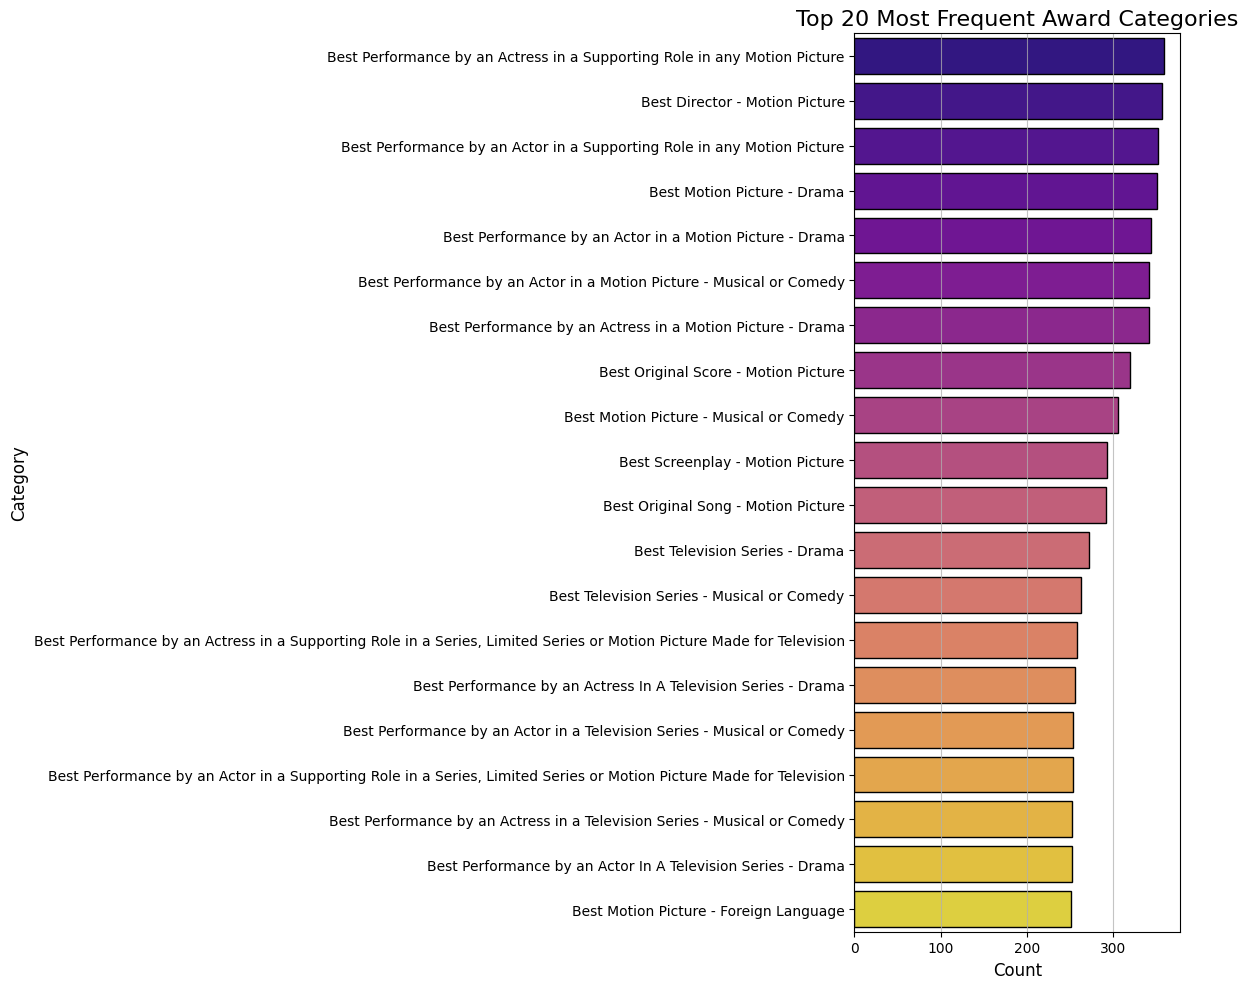

In [23]:
## Get the top 20 categories by count
top_20_categories = award_df['category'].value_counts().nlargest(20).index

## Filter the DataFrame to include only the top 20 categories
df_top_20 = award_df[award_df['category'].isin(top_20_categories)]

## Create the count plot for the top 20 categories
plt.figure(figsize=(12, 10)) # Adjust figure size to accommodate 20 bars
sns.countplot(data=df_top_20, y='category', order=top_20_categories, palette='plasma', edgecolor='black')
plt.title('Top 20 Most Frequent Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Set plot titles and labels
plt.title('Top 20 Most Frequent Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

## Add a grid for better readability
plt.grid(axis='x', alpha=0.75)

## Adjust layout
plt.tight_layout()

## Display the plot
plt.show();

 This plot reinforces the findings from the treemap, providing a clearer ranking of the most nominated categories.

In [24]:
# Separate awards for actors by checking if 'category' contains 'Actor'
actor_awards = award_df[award_df['category'].str.contains('Actor', na=False)]

# Separate awards for actresses by checking if 'category' contains 'Actress'
actress_awards = award_df[award_df['category'].str.contains('Actress', na=False)]

# Print the DataFrame containing actor awards
print("Actor Awards:")
print(actor_awards)


Actor Awards:
      year_film  year_award  ceremony  \
1          1943        1944         1   
5          1943        1944         1   
7          1944        1945         2   
11         1944        1945         2   
13         1945        1946         3   
...         ...         ...       ...   
7984       2019        2020        77   
7985       2019        2020        77   
7986       2019        2020        77   
7987       2019        2020        77   
7988       2019        2020        77   

                                               category            nominee  \
1     Best Performance by an Actor in a Supporting R...      Akim Tamiroff   
5                               Actor In A Leading Role         Paul Lukas   
7     Best Performance by an Actor in a Supporting R...   Barry Fitzgerald   
11                              Actor In A Leading Role     Alexander Knox   
13    Best Performance by an Actor in a Supporting R...   J. Carroll Naish   
...                      

In [25]:
# Print the DataFrame containing actress awards
print("\nActress Awards:") # Add a newline for better separation in the output
print(actress_awards)


Actress Awards:
      year_film  year_award  ceremony  \
0          1943        1944         1   
4          1943        1944         1   
6          1944        1945         2   
10         1944        1945         2   
12         1945        1946         3   
...         ...         ...       ...   
7979       2019        2020        77   
7980       2019        2020        77   
7981       2019        2020        77   
7982       2019        2020        77   
7983       2019        2020        77   

                                               category               nominee  \
0     Best Performance by an Actress in a Supporting...        Katina Paxinou   
4                             Actress In A Leading Role        Jennifer Jones   
6     Best Performance by an Actress in a Supporting...       Agnes Moorehead   
10                            Actress In A Leading Role        Ingrid Bergman   
12    Best Performance by an Actress in a Supporting...       Angela Lansbury   
... 

<ipython-input-26-a87a001d83a2>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




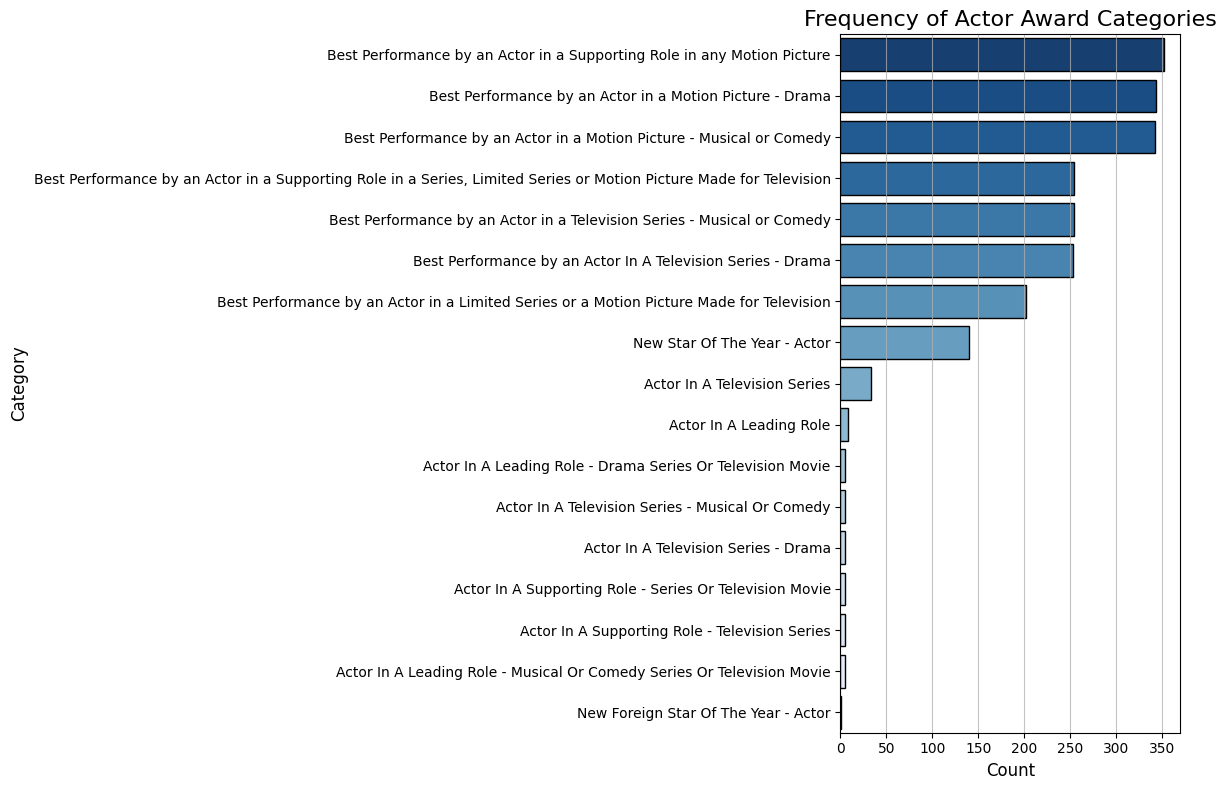

In [26]:
import matplotlib.pyplot as plt
## Count plot for Actor Awards
plt.figure(figsize=(12, 8))
sns.countplot(data=actor_awards, y='category', order=actor_awards['category'].value_counts().index, palette='Blues_r', edgecolor='black')
plt.title('Frequency of Actor Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()


It breaks down the actor-specific awards, showing which types of acting roles (e.g., lead vs. supporting, film vs. TV) have the most nominations for male actors.

<ipython-input-27-e713ff976c25>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




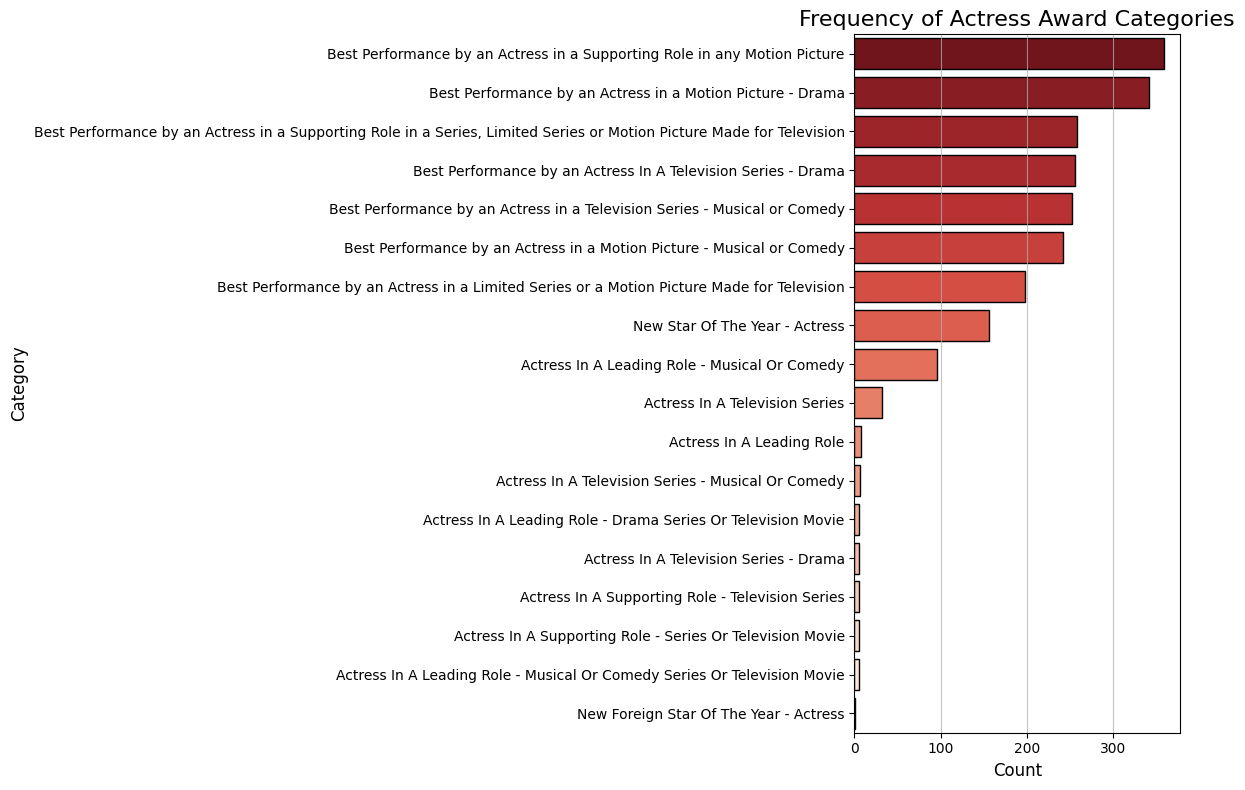

In [27]:
## Count plot for Actress Awards
plt.figure(figsize=(12, 8))
sns.countplot(data=actress_awards, y='category', order=actress_awards['category'].value_counts().index, palette='Reds_r', edgecolor='black')
plt.title('Frequency of Actress Award Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()


This shows the distribution of nominations for female actors across different role types and media.

Index(['year_film', 'year_award', 'ceremony', 'category', 'nominee', 'film',
       'win'],
      dtype='object')


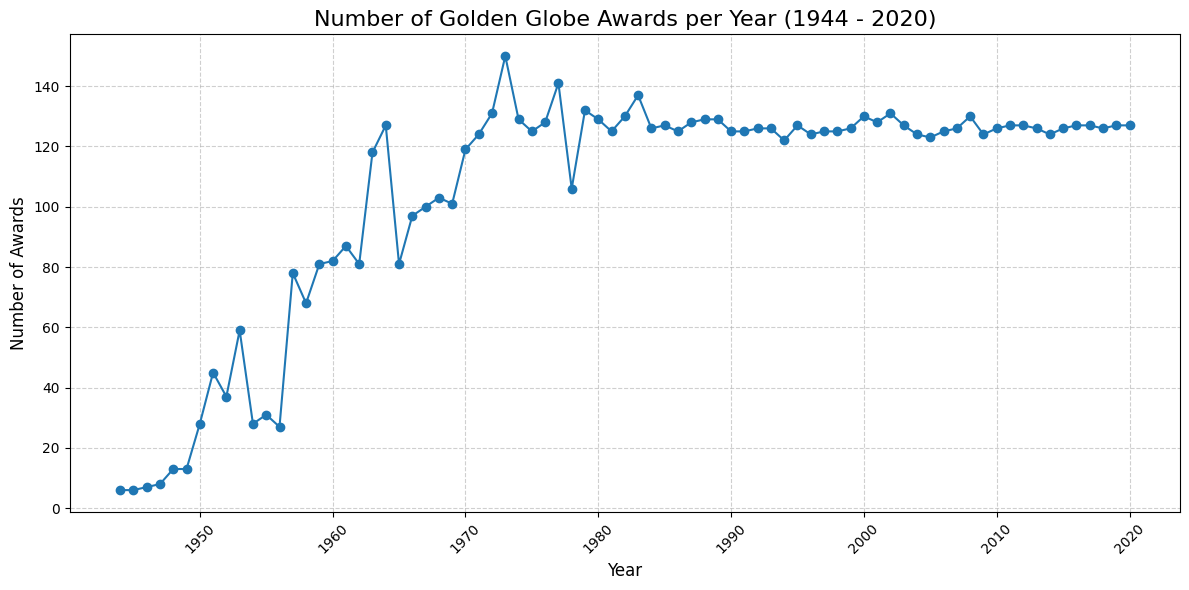

In [28]:
print(award_df.columns)
# awards_per_year = award_df['year'].value_counts().sort_index() # Original line
awards_per_year = award_df['year_award'].value_counts().sort_index()

## Create a line plot of awards per year
plt.figure(figsize=(12, 6))
awards_per_year.plot(kind='line', marker='o') # Use the plot method of the pandas Series
plt.title('Number of Golden Globe Awards per Year (1944 - 2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

This plot illustrates the historical growth or fluctuation in the sheer number of Golden Globe awards presented or nominated for each year. You can observe trends  expansion and contraction from 1944 to 1980, bu from 1980 onward, the number of awards reached a relatively consistent average, suggesting an established selection process.


<ipython-input-60-bbe5cf0fa8c2>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-60-bbe5cf0fa8c2>:29: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



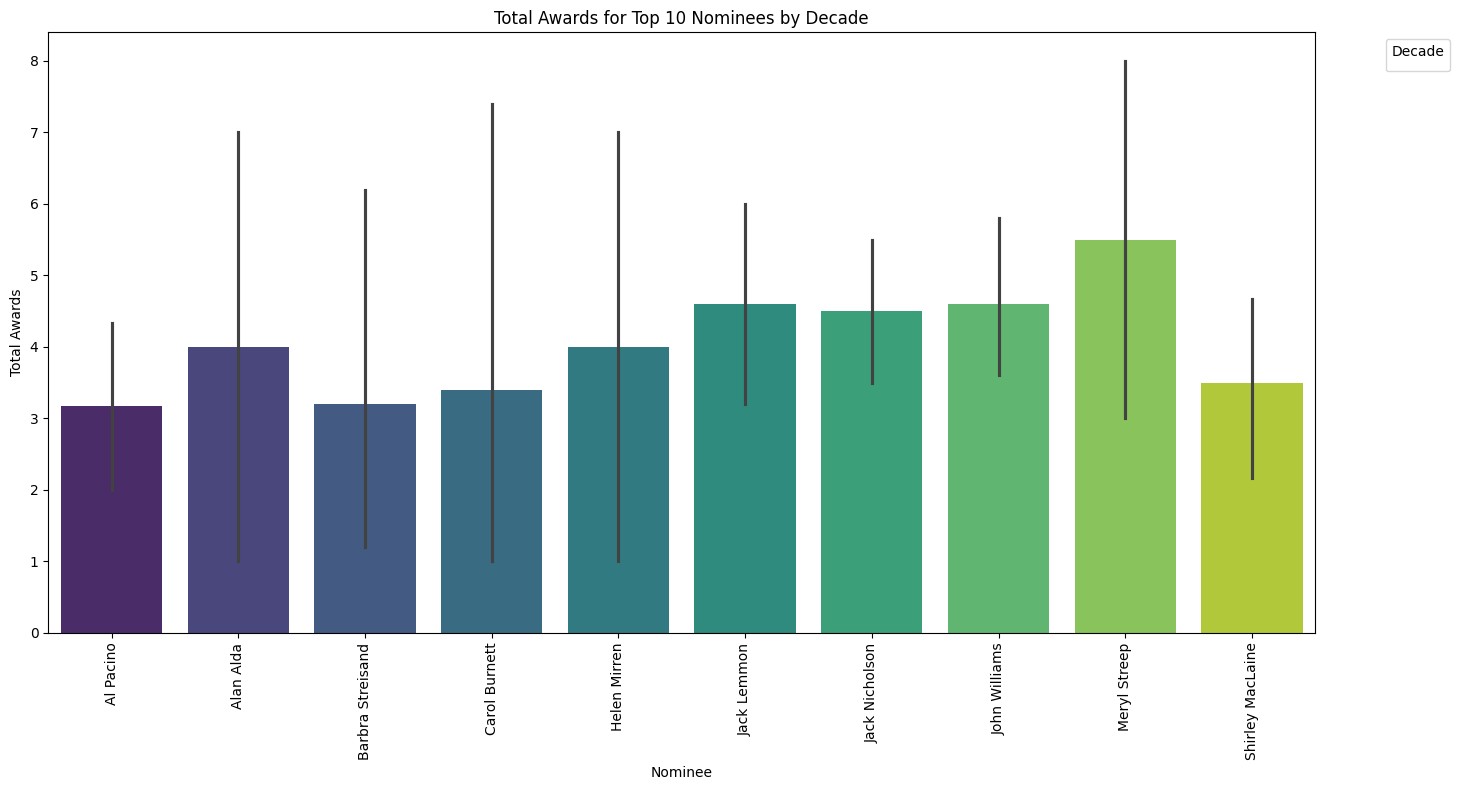

In [60]:
# Let's find the top nominees based on total awards across all decades
# print(award_df.columns) # Already printed and confirmed

if 'decade' not in award_df.columns:
  # Use the correct column name 'year_award' to calculate the decade
  award_df['decade'] = (award_df['year_award'] // 10) * 10
  # Convert the 'decade' column to a standard integer type to avoid TypeError with Seaborn legend
  # Ensure it's a standard int type to avoid compatibility issues with visualization libraries
  award_df['decade'] = award_df['decade'].astype(int)

 # --- Data Aggregation ---
# Group by nominee and decade, then count the number of awards
nominee_awards_by_decade = award_df.groupby(['nominee', 'decade']).size().reset_index(name='award_count')

# Get top 10 nominees
top_nominees = nominee_awards_by_decade.groupby('nominee')['award_count'].sum().nlargest(10).index.tolist()

# Filter the aggregated data for the top nominees
top_nominee_awards_by_decade = nominee_awards_by_decade[nominee_awards_by_decade['nominee'].isin(top_nominees)]

# Increase figure width slightly and adjust rect for tight_layout
plt.figure(figsize=(18, 8)) # Increased figure width
# Use the converted 'decade' column in the barplot
sns.barplot(data=top_nominee_awards_by_decade, x='nominee', y='award_count', palette='viridis')
plt.title('Total Awards for Top 10 Nominees by Decade')
plt.xlabel('Nominee')
plt.ylabel('Total Awards')
plt.xticks(rotation=90)
plt.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusted rect to provide slightly more space on the left and right
plt.tight_layout(rect=[0.03, 0, 0.85, 1]) # Increased left margin (0.03)
plt.show(); # Add plt.show() to display the plot

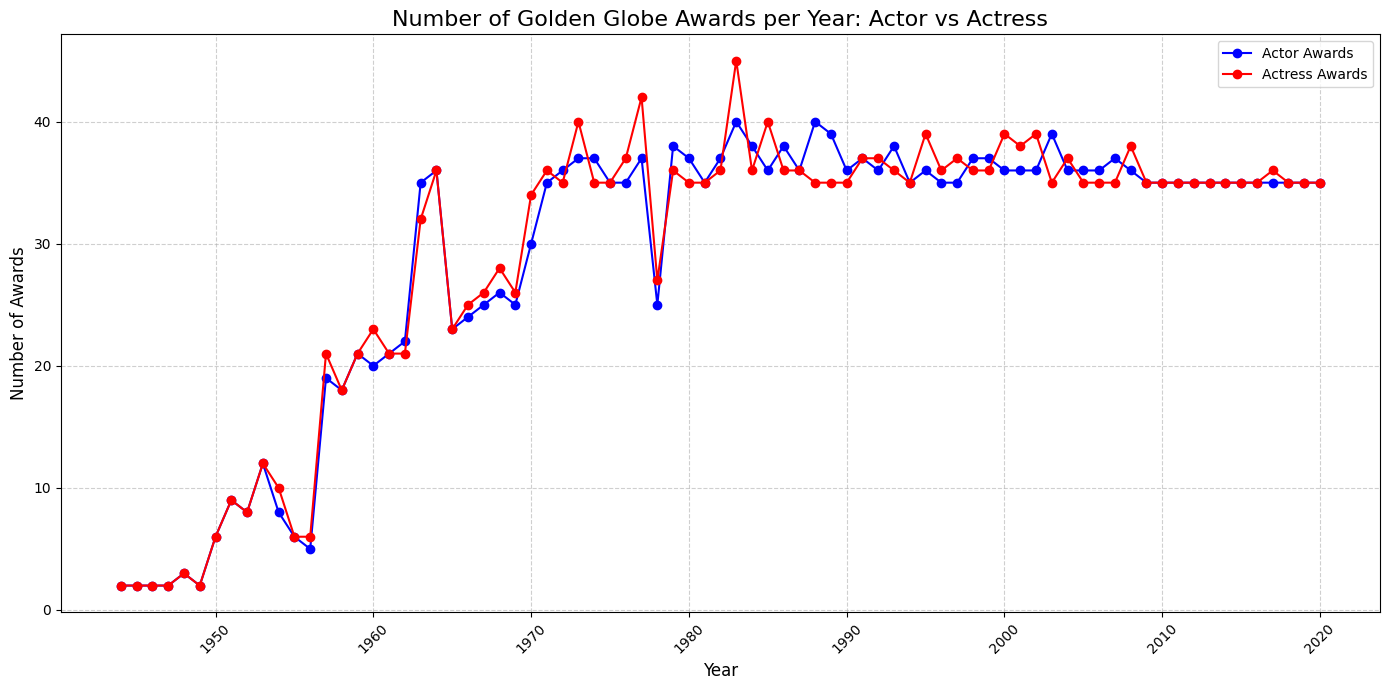

In [32]:
# Ensure 'year_award' is treated as a numeric column if it's not already
actor_awards['year_award'] = pd.to_numeric(actor_awards['year_award'], errors='coerce')
actress_awards['year_award'] = pd.to_numeric(actress_awards['year_award'], errors='coerce')

# Drop any rows where conversion to numeric failed (if errors='coerce')
actor_awards = actor_awards.dropna(subset=['year_award'])
actress_awards = actress_awards.dropna(subset=['year_award'])

# Count awards per year for actors and actresses
actor_awards_per_year = actor_awards['year_award'].value_counts().sort_index()
actress_awards_per_year = actress_awards['year_award'].value_counts().sort_index()

# Create a line plot comparing awards per year for actors and actresses
plt.figure(figsize=(14, 7))
plt.plot(actor_awards_per_year.index, actor_awards_per_year.values, marker='o', linestyle='-', label='Actor Awards', color='blue')
plt.plot(actress_awards_per_year.index, actress_awards_per_year.values, marker='o', linestyle='-', label='Actress Awards', color='red')

plt.title('Number of Golden Globe Awards per Year: Actor vs Actress', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend() # Add a legend to distinguish the lines
plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import chi2_contingency
import pandas as pd

# Ensure actor_awards and actress_awards DataFrames are available
# These should have been created in previous steps using:
# actor_awards = award_df[award_df['category'].str.contains('Actor', na=False)].copy()
# actress_awards = award_df[award_df['category'].str.contains('Actress', na=False)].copy()

# It's good practice to ensure the 'win' column is boolean/numeric for analysis
actor_awards['win'] = actor_awards['win'].astype(bool)
actress_awards['win'] = actress_awards['win'].astype(bool)

# Add a 'Gender_Category' column to distinguish actor/actress entries
actor_awards['Gender_Category'] = 'Actor'
actress_awards['Gender_Category'] = 'Actress'

# Combine the data
acting_awards_combined = pd.concat([actor_awards, actress_awards])

# Create a contingency table
# Rows: Gender_Category (Actor, Actress)
# Columns: Win (False for Nomination/Loss, True for Win)
contingency_table = pd.crosstab(acting_awards_combined['Gender_Category'], acting_awards_combined['win'])

print("Contingency Table (Gender Category vs. Win Status):")
print(contingency_table)
print("\n")

# Perform the Chi-Square Test
# chi2: The Chi-Square statistic
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies under the null hypothesis
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies under Null Hypothesis:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpret the results
alpha = 0.05 # Set your significance level

print("\nInterpretation:")
if p < alpha:
    print(f"Since the p-value ({p:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant association between gender category (Actor/Actress) and the outcome (Win/Nomination).")
    print("This suggests evidence of potential gender bias in the distribution of Golden Globe acting awards.")
else:
    print(f"Since the p-value ({p:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant association between gender category (Actor/Actress) and the outcome (Win/Nomination) based on this test.")
    print("This does not provide statistically significant evidence of gender bias in the distribution of Golden Globe acting awards.")

#  Look at the observed vs. expected frequencies to see where differences occur
print("\nObserved Frequencies:")
print(contingency_table)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

#  calculate observed proportions to see the actual win rates
observed_win_rate_actor = contingency_table.loc['Actor', True] / contingency_table.loc['Actor'].sum()
observed_win_rate_actress = contingency_table.loc['Actress', True] / contingency_table.loc['Actress'].sum()

print(f"\nObserved Win Rate for Actor Categories: {observed_win_rate_actor:.2%}")
print(f"Observed Win Rate for Actress Categories: {observed_win_rate_actress:.2%}")

Contingency Table (Gender Category vs. Win Status):
win              False  True 
Gender_Category              
Actor             1719    494
Actress           1737    496


Chi-Square Statistic: 0.0027
P-value: 0.9582
Degrees of Freedom: 1
Expected Frequencies under Null Hypothesis:
win                    False       True 
Gender_Category                         
Actor            1720.226721  492.773279
Actress          1735.773279  497.226721

Interpretation:
Since the p-value (0.9582) is greater than the significance level (0.05), we fail to reject the null hypothesis.
There is no statistically significant association between gender category (Actor/Actress) and the outcome (Win/Nomination) based on this test.
This does not provide statistically significant evidence of gender bias in the distribution of Golden Globe acting awards.

Observed Frequencies:
win              False  True 
Gender_Category              
Actor             1719    494
Actress           1737    496

Expected Fr

In [35]:
# Filter the DataFrame for TV series
# We'll look for keywords in the 'category' column
tv_series_keywords = ['Television', 'Series', 'TV']
tv_awards_df = award_df[
    award_df['category'].str.contains('|'.join(tv_series_keywords), case=False, na=False)
]

# Display the first few rows of the filtered DataFrame
print("TV Series Awards Data:")
print(tv_awards_df.head())

# Print the number of TV series award entries found
print(f"\nTotal TV series award entries: {tv_awards_df.shape[0]}")

TV Series Awards Data:
     year_film  year_award  ceremony                category  \
296       1955        1956        13  Television Achievement   
297       1955        1956        13  Television Achievement   
354       1956        1957        14  Television Achievement   
355       1956        1957        14  Television Achievement   
356       1956        1957        14  Television Achievement   

                    nominee  \
296              Desi Arnaz   
297             Dinah Shore   
354                Cheyenne   
355         Matinee Theatre   
356  Mickey Mouse Club, The   

                                                  film   win  
296                               American Comedy, The  True  
297  Walt Disney's Wonderful World of Color (Davy C...  True  
354                                                N/s  True  
355                                                N/s  True  
356                                                N/s  True  

Total TV series award entr

The plot shows a steady rise in TV awards from 1955 to 1980, followed by a stabilized trend in later decades.


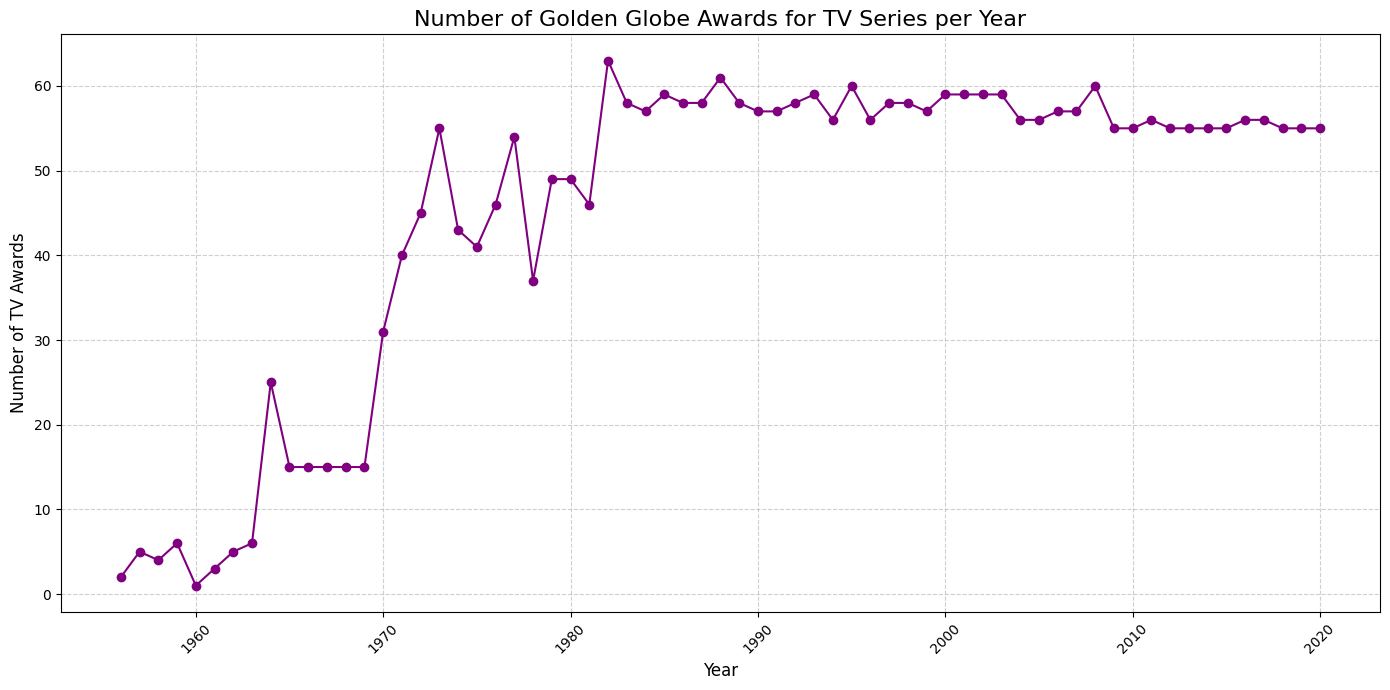

In [36]:
# Count TV awards per year
tv_awards_per_year = tv_awards_df['year_award'].value_counts().sort_index()

# Create a line plot for TV series awards per year
plt.figure(figsize=(14, 7))
plt.plot(tv_awards_per_year.index, tv_awards_per_year.values, marker='o', linestyle='-', color='purple')

plt.title('Number of Golden Globe Awards for TV Series per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of TV Awards', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

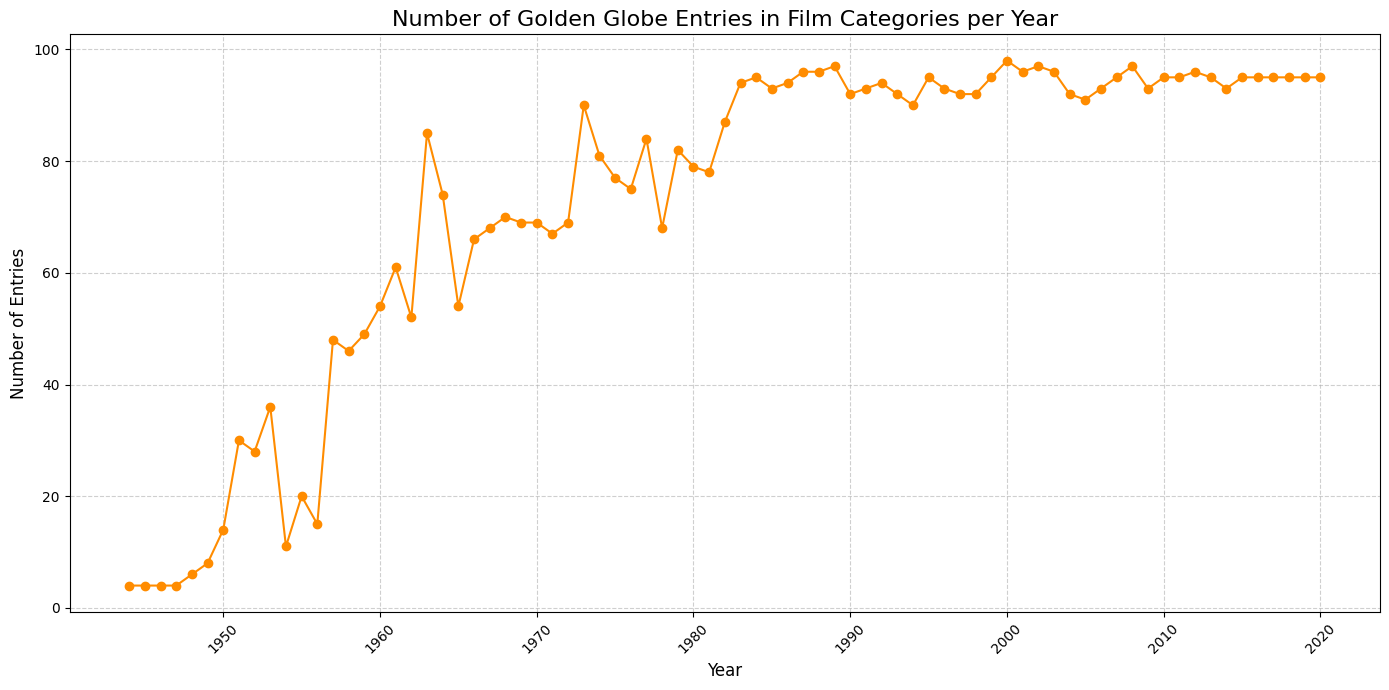

In [37]:
# Define keywords to identify Film categories
# Ensure these keywords accurately capture all film-related awards in your dataset
film_keywords = ['Film', 'Picture', 'Motion']

# Filter the DataFrame for Film awards
# This includes both nominations and wins that fall under Film categories
# We use .copy() to avoid potential SettingWithCopyWarning later
film_awards_df = award_df[
    award_df['category'].str.contains('|'.join(film_keywords), case=False, na=False)

].copy()


# Ensure 'year_award' is treated as a numeric column if it's not already
film_awards_df['year_award'] = pd.to_numeric(film_awards_df['year_award'], errors='coerce')

# Drop any rows where conversion to numeric failed (if errors='coerce')
film_awards_df = film_awards_df.dropna(subset=['year_award'])


# Count Film entries (nominations/wins) per year
# 'value_counts()' counts the occurrences of each unique year_award
# 'sort_index()' orders the years chronologically
film_awards_per_year = film_awards_df['year_award'].value_counts().sort_index()

# Create a line plot for Film awards per year
plt.figure(figsize=(14, 7))
# Plot the years on the x-axis and the counts on the y-axis
plt.plot(film_awards_per_year.index, film_awards_per_year.values, marker='o', linestyle='-', color='darkorange') # Using a distinct color

# Set plot titles and labels
plt.title('Number of Golden Globe Entries in Film Categories per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability if there are many years
plt.xticks(rotation=45)

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()

The plot shows a steady increase in film entries at the Golden Globes, followed by stabilization after 1980. This suggests industry growth and a more structured nomination process


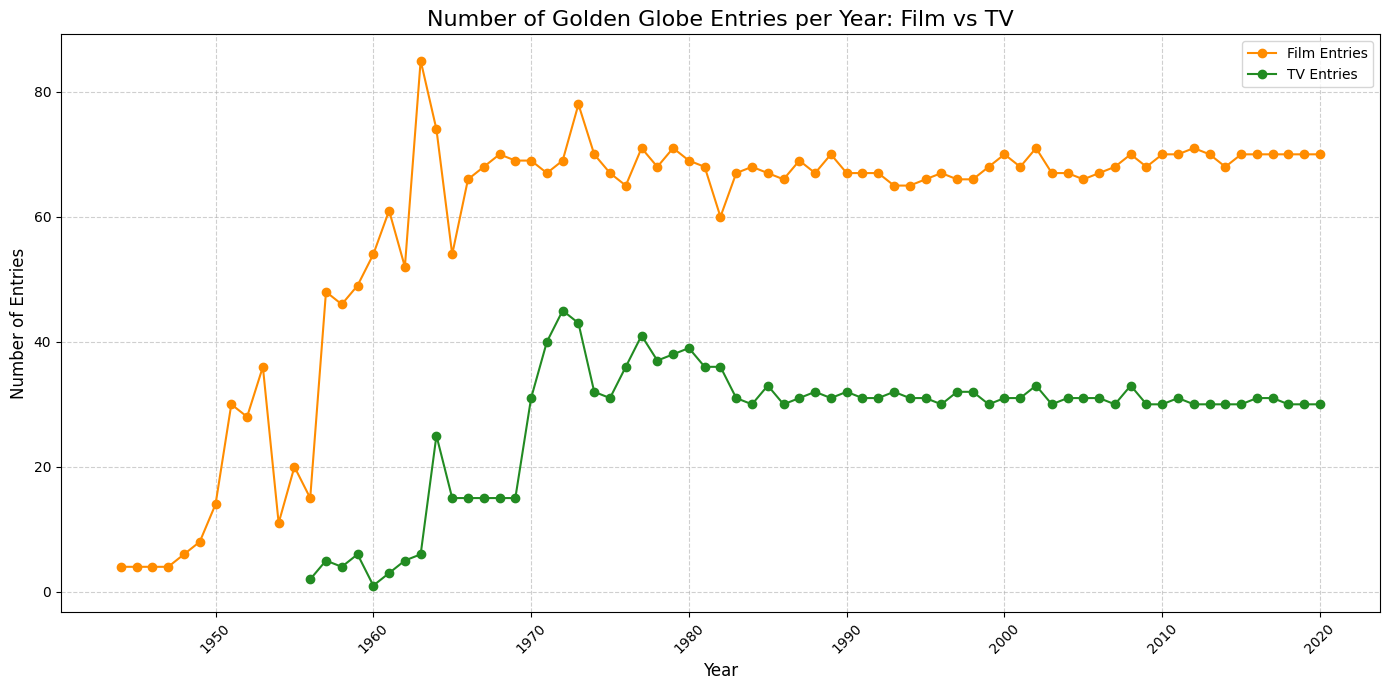

In [38]:
film_keywords = ['Film', 'Picture', 'Motion']
tv_keywords = ['Television', 'Series', 'TV']

# Filter the DataFrame for Film entries (nominations + wins)
# Exclude categories that might explicitly mention TV if needed for strict separation
film_entries_df = award_df[
    award_df['category'].str.contains('|'.join(film_keywords), case=False, na=False) &
    ~award_df['category'].str.contains('|'.join(tv_keywords), case=False, na=False) # Exclude categories also containing TV keywords
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Filter the DataFrame for TV entries (nominations + wins)
# Exclude categories that might explicitly mention Film if needed for strict separation
tv_entries_df = award_df[
    award_df['category'].str.contains('|'.join(tv_keywords), case=False, na=False) &
    ~award_df['category'].str.contains('|'.join(film_keywords), case=False, na=False) # Exclude categories also containing Film keywords
].copy() # Use .copy() to avoid SettingWithCopyWarning


# Ensure 'year_award' is treated as a numeric column for both filtered DataFrames
film_entries_df['year_award'] = pd.to_numeric(film_entries_df['year_award'], errors='coerce')
tv_entries_df['year_award'] = pd.to_numeric(tv_entries_df['year_award'], errors='coerce')

# Drop any rows where conversion to numeric failed
film_entries_df = film_entries_df.dropna(subset=['year_award'])
tv_entries_df = tv_entries_df.dropna(subset=['year_award'])

# Count Film entries per year
film_entries_per_year = film_entries_df['year_award'].value_counts().sort_index()

# Count TV entries per year
tv_entries_per_year = tv_entries_df['year_award'].value_counts().sort_index()

# Create a single figure and plot both lines
plt.figure(figsize=(14, 7))

# Plot the Film entries per year
plt.plot(film_entries_per_year.index, film_entries_per_year.values, marker='o', linestyle='-', label='Film Entries', color='darkorange')

# Plot the TV entries per year
plt.plot(tv_entries_per_year.index, tv_entries_per_year.values, marker='o', linestyle='-', label='TV Entries', color='forestgreen')


# Set plot titles and labels
plt.title('Number of Golden Globe Entries per Year: Film vs TV', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)

# Add a legend to distinguish the lines
plt.legend()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Display the plot
plt.show()

The data suggests a bias in Golden Globe award distribution, with films consistently receiving more recognition than television shows. Historically, film awards have outnumbered TV awards, reinforcing the perception that movies hold greater prestige. While television awards have increased over time, the disparity remains, indicating an institutional preference for film. Addressing this bias could lead to a more balanced recognition of achievements across both industries.we will explore more by performing the statistical data

Contingency Table (Medium Category vs. Win Status):
win              False  True 
Medium_Category              
Film              3451   1010
TV                1408    383


Chi-Square Statistic: 1.0927
P-value: 0.2959
Degrees of Freedom: 1
Expected Frequencies under Null Hypothesis:
win                    False       True 
Medium_Category                         
Film             3467.050384  993.949616
TV               1391.949616  399.050384

Interpretation:
Since the p-value (0.2959) is greater than the significance level (0.05), we fail to reject the null hypothesis.
There is no statistically significant association between the medium category (Film/TV) and the outcome (Win/Nomination) based on this test.
This does not provide statistically significant evidence of bias towards one medium over the other.

Observed Frequencies:
win              False  True 
Medium_Category              
Film              3451   1010
TV                1408    383

Expected Frequencies:
win           

<ipython-input-39-6859e652d368>:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




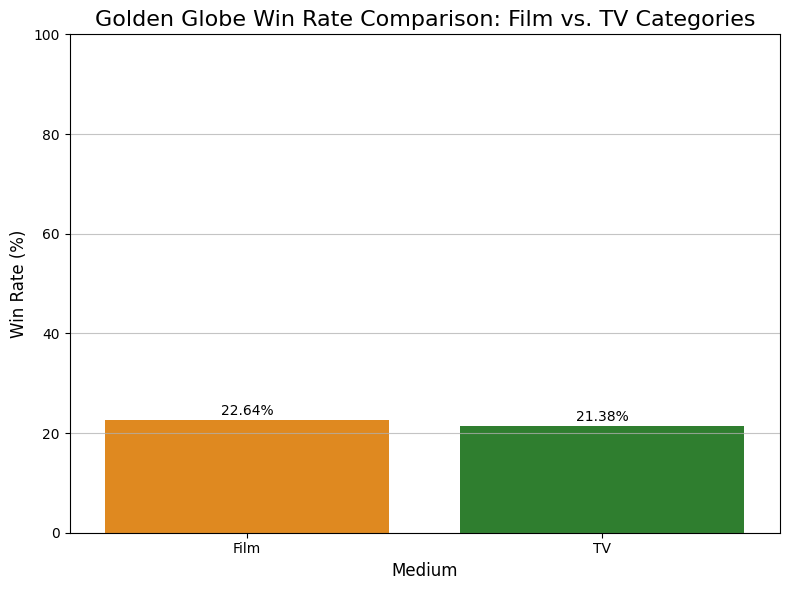

In [39]:
film_keywords = ['Film', 'Picture', 'Motion']
tv_keywords = ['Television', 'Series', 'TV']

# Filter the DataFrame for Film entries (including both nominations and wins)
# We need all entries to calculate the rate
film_entries_df = award_df[
    award_df['category'].str.contains('|'.join(film_keywords), case=False, na=False) &
    ~award_df['category'].str.contains('|'.join(tv_keywords), case=False, na=False) # Exclude categories that might contain both
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Filter the DataFrame for TV entries (including both nominations and wins)
tv_entries_df = award_df[
    award_df['category'].str.contains('|'.join(tv_keywords), case=False, na=False) &
    ~award_df['category'].str.contains('|'.join(film_keywords), case=False, na=False) # Exclude categories that might contain both
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Ensure 'win' column is boolean/numeric for analysis
# Convert to boolean first, then integer if needed by chi2_contingency (it handles booleans)
film_entries_df['win'] = film_entries_df['win'].astype(bool)
tv_entries_df['win'] = tv_entries_df['win'].astype(bool)

# Add a 'Medium_Category' column to distinguish film/tv entries
film_entries_df['Medium_Category'] = 'Film'
tv_entries_df['Medium_Category'] = 'TV'

# Combine the data
all_awards_combined = pd.concat([film_entries_df, tv_entries_df])

# Create a contingency table
# Rows: Medium_Category (Film, TV)
# Columns: Win (False for Nomination/Loss, True for Win)
contingency_table_medium = pd.crosstab(all_awards_combined['Medium_Category'], all_awards_combined['win'])

print("Contingency Table (Medium Category vs. Win Status):")
print(contingency_table_medium)
print("\n")

# Perform the Chi-Square Test
# chi2: The Chi-Square statistic
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies under the null hypothesis
chi2_medium, p_medium, dof_medium, expected_medium = chi2_contingency(contingency_table_medium)

print(f"Chi-Square Statistic: {chi2_medium:.4f}")
print(f"P-value: {p_medium:.4f}")
print(f"Degrees of Freedom: {dof_medium}")
print("Expected Frequencies under Null Hypothesis:")
print(pd.DataFrame(expected_medium, index=contingency_table_medium.index, columns=contingency_table_medium.columns))

# Interpret the results
alpha = 0.05 # Set your significance level

print("\nInterpretation:")
if p_medium < alpha:
    print(f"Since the p-value ({p_medium:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant association between the medium category (Film/TV) and the outcome (Win/Nomination).")
    print("This suggests evidence of potential bias in the distribution of Golden Globe awards towards one medium over the other.")
else:
    print(f"Since the p-value ({p_medium:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant association between the medium category (Film/TV) and the outcome (Win/Nomination) based on this test.")
    print("This does not provide statistically significant evidence of bias towards one medium over the other.")

# Optional: Look at the observed vs. expected frequencies to see where differences occur
print("\nObserved Frequencies:")
print(contingency_table_medium)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected_medium, index=contingency_table_medium.index, columns=contingency_table_medium.columns))

# Calculate and print observed win rates for context
# Use the contingency table for these calculations
observed_win_rate_film = contingency_table_medium.loc['Film', True] / contingency_table_medium.loc['Film'].sum()
observed_win_rate_tv = contingency_table_medium.loc['TV', True] / contingency_table_medium.loc['TV'].sum()

print(f"\nObserved Win Rate for Film Categories: {observed_win_rate_film:.2%}")
print(f"Observed Win Rate for TV Categories: {observed_win_rate_tv:.2%}")

#Visualize the Win Rates for Film vs TV (Bar Plot)
win_rates_medium_df = pd.DataFrame({
    'Medium': ['Film', 'TV'],
    'Win Rate (%)': [observed_win_rate_film * 100, observed_win_rate_tv * 100]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Medium', y='Win Rate (%)', data=win_rates_medium_df, palette=['darkorange', 'forestgreen'])
plt.title('Golden Globe Win Rate Comparison: Film vs. TV Categories', fontsize=16)
plt.xlabel('Medium', fontsize=12)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.ylim(0, 100) # Set y-axis limit to 0-100 for percentage
plt.grid(axis='y', alpha=0.75)

# Add win rate values on top of bars
for index, row in win_rates_medium_df.iterrows():
    plt.text(index, row['Win Rate (%)'] + 1, f"{row['Win Rate (%)']:.2f}%", ha='center')

plt.tight_layout()
plt.show()

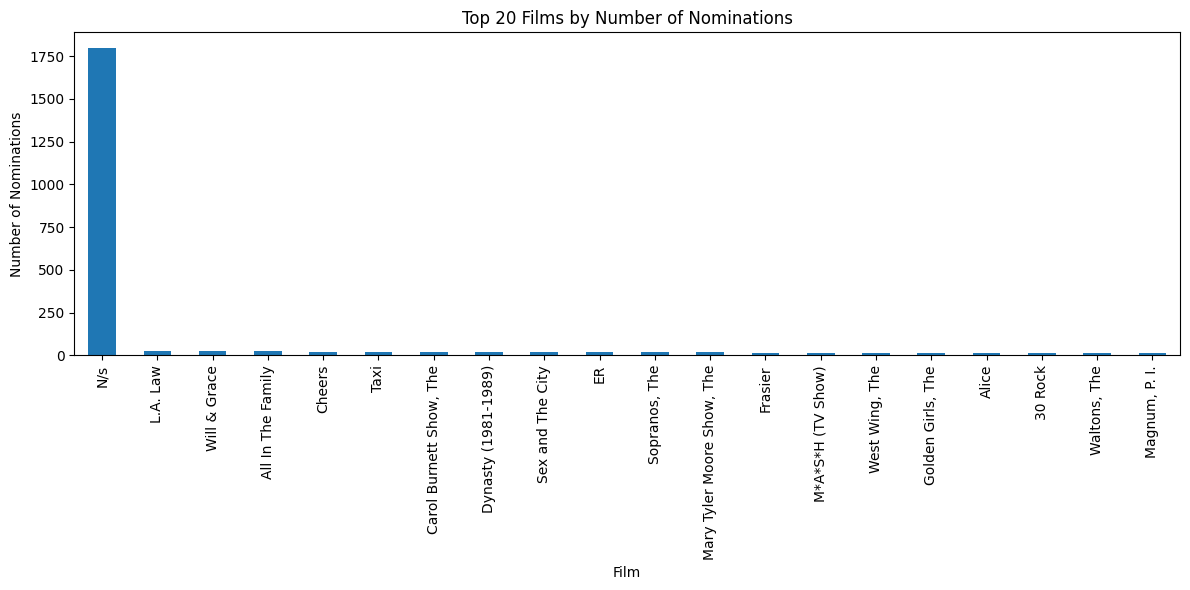

In [40]:
# Count nominations per film
film_nominations = award_df['film'].value_counts()

# Get the top 20 films by nominations
top_20_film_nominations = film_nominations.head(20)

# Plot the top 20 data
plt.figure(figsize=(12, 6))
top_20_film_nominations.plot(kind='bar') # Plot the top 20 series
plt.title('Top 20 Films by Number of Nominations') # Update title
plt.xlabel('Film')
plt.ylabel('Number of Nominations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

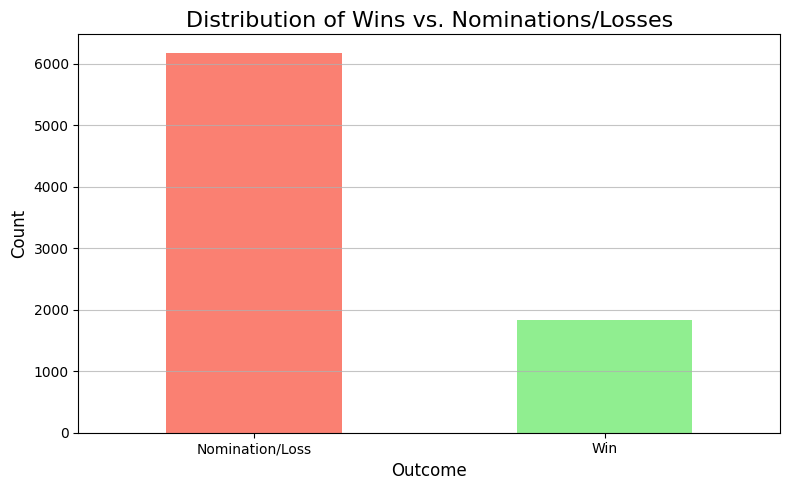

In [41]:
# Count the occurrences of True (wins) and False (nominations/losses) in the 'win' column
win_counts = award_df['win'].value_counts()

# Rename the index for better readability in the plot
win_counts.index = ['Nomination/Loss', 'Win'] # Assuming False is first, True is second based on typical value_counts output

# Create a bar plot
plt.figure(figsize=(8, 5))
win_counts.plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Distribution of Wins vs. Nominations/Losses', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0) # Keep labels horizontal
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

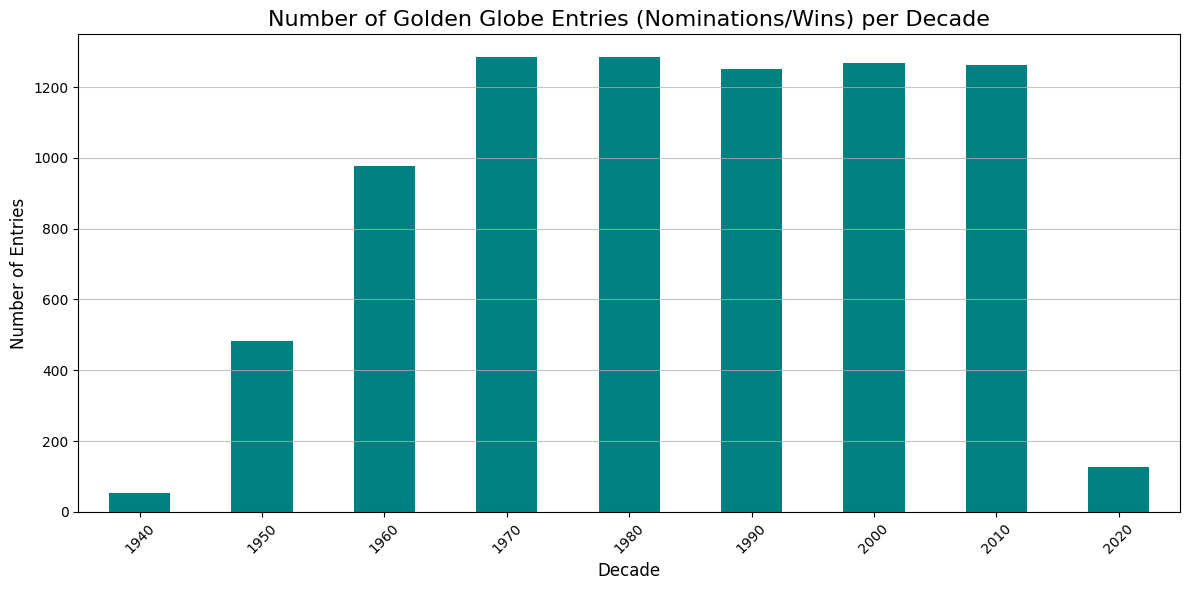

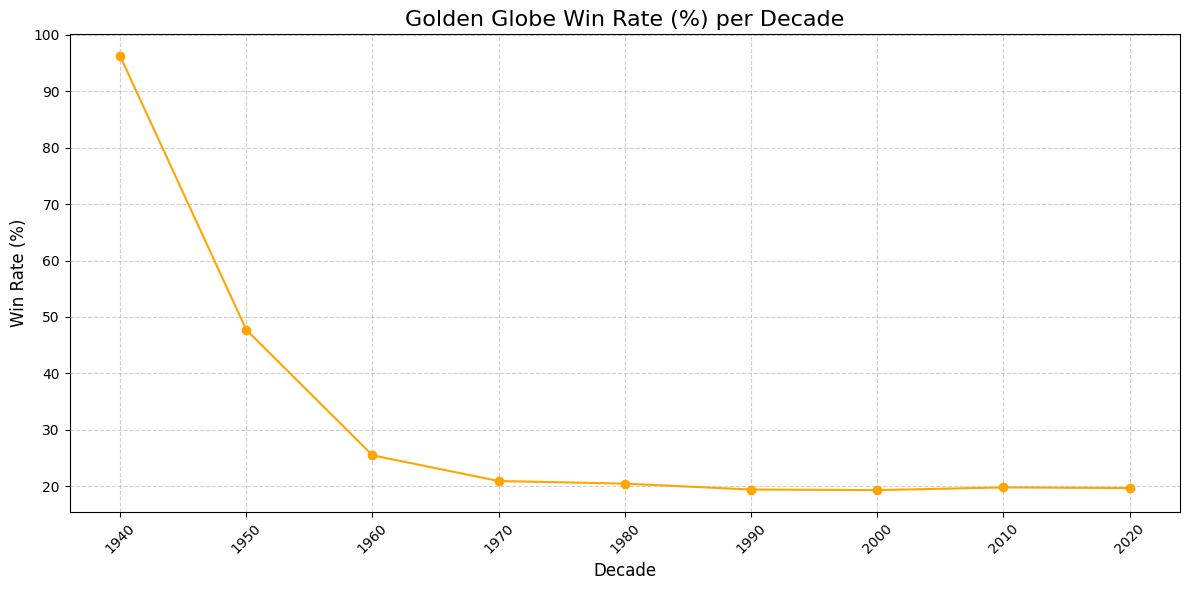

In [42]:
# Ensure 'year_award' is an integer type
award_df['year_award'] = pd.to_numeric(award_df['year_award'], errors='coerce').astype('Int64')

# Drop any rows where year_award couldn't be converted
award_df_cleaned_years = award_df.dropna(subset=['year_award'])

# Create a 'decade' column
award_df_cleaned_years['decade'] = (award_df_cleaned_years['year_award'] // 10) * 10

# 1. Plotting the number of nominees (entries) per decade

# Count entries per decade
entries_per_decade = award_df_cleaned_years['decade'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
entries_per_decade.plot(kind='bar', color='teal')
plt.title('Number of Golden Globe Entries (Nominations/Wins) per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 2. Calculating and plotting the win rate per decade

# Group by decade and calculate the mean of the 'win' column (True=1, False=0)
win_rate_per_decade = award_df_cleaned_years.groupby('decade')['win'].mean() * 100 # Multiply by 100 for percentage

plt.figure(figsize=(12, 6))
win_rate_per_decade.plot(kind='line', marker='o', color='orange')
plt.title('Golden Globe Win Rate (%) per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.xticks(win_rate_per_decade.index, rotation=45) # Set x-ticks to be the decades
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The plot shows fluctuations in award distribution from 1944 to 1980, followed by stabilization, indicating an evolving nomination process and industry standardization


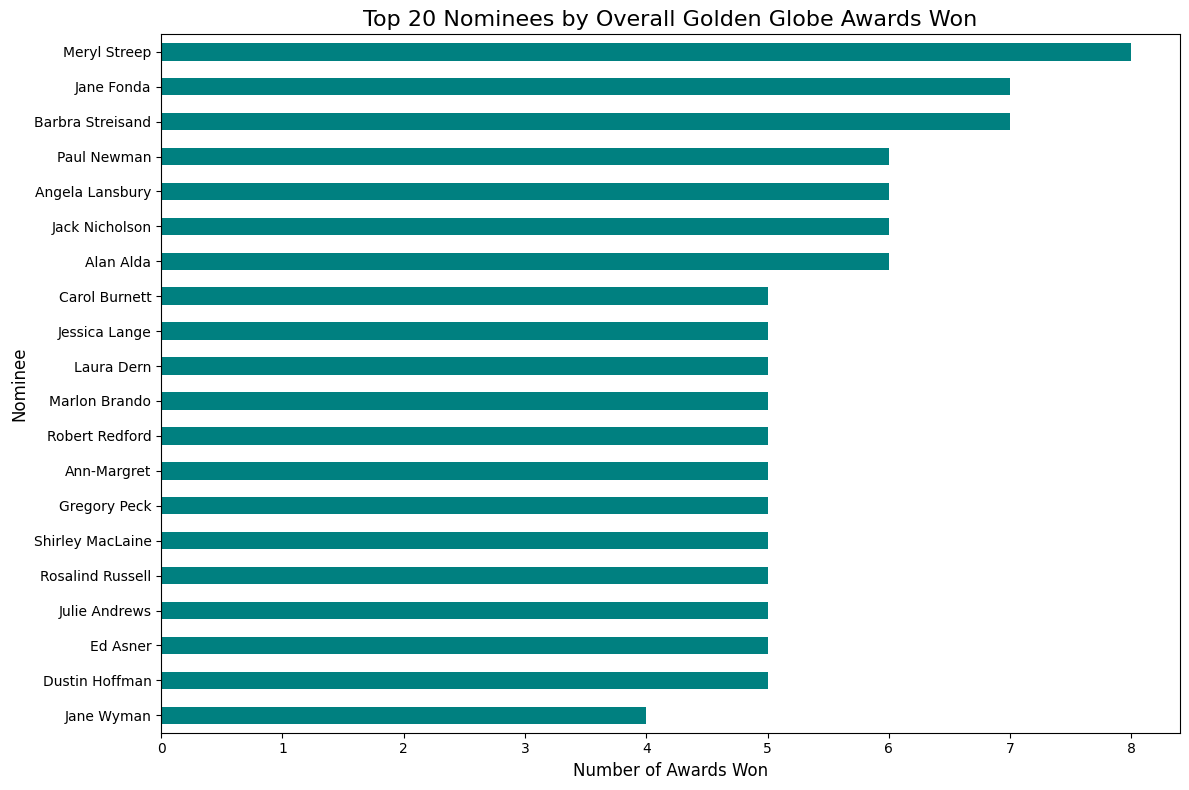

In [43]:
# plot: Recurring Winners (Top Nominees) ---
# Filter the DataFrame to include only winning entries
winning_awards_df = award_df[award_df['win'] == True]

# Filter winning entries for acting categories (or all winners depending on definition of 'nominee')
# Let's show overall top winning nominees first, then acting wins again.
# Count the number of wins for each nominee
nominee_wins_overall = winning_awards_df['nominee'].value_counts()

# Get the top N nominees by number of wins (overall)
top_n_nominees_wins_overall = nominee_wins_overall.head(20)

# Create a bar plot for the top N nominees by wins (overall)
plt.figure(figsize=(12, 8))
top_n_nominees_wins_overall.plot(kind='barh', color='teal')
plt.title('Top 20 Nominees by Overall Golden Globe Awards Won', fontsize=16)
plt.xlabel('Number of Awards Won', fontsize=12)
plt.ylabel('Nominee', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


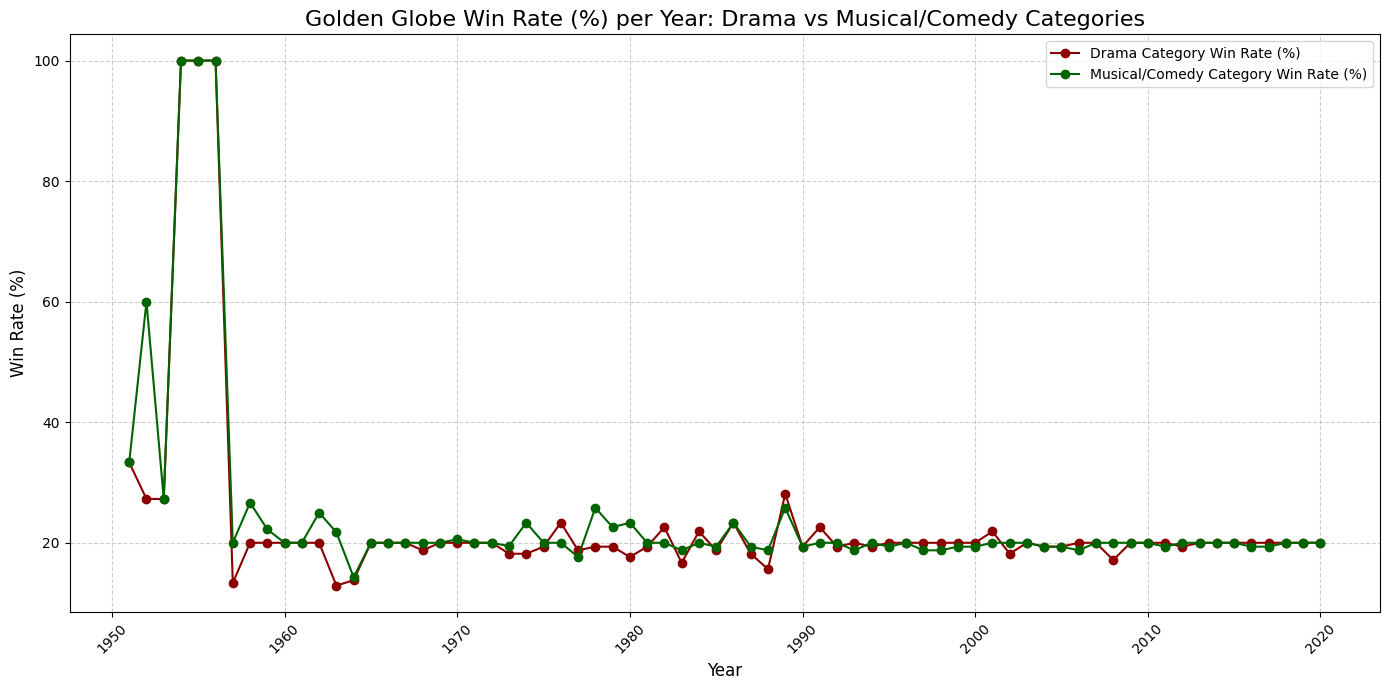

In [44]:
# --- Optional Plot: Win Rate Comparison for Drama vs Musical/Comedy Categories ---

# Define keywords to identify Drama and Musical/Comedy categories
drama_keywords = ['Drama']
musical_comedy_keywords = ['Musical or Comedy', 'Musical', 'Comedy'] # Check for exact phrasing in your data

# Filter the DataFrame for Drama categories (including both nominations and wins)
drama_entries_df = award_df[
    award_df['category'].str.contains('|'.join(drama_keywords), case=False, na=False) &
    ~award_df['category'].str.contains('|'.join(musical_comedy_keywords), case=False, na=False) # Exclude categories that mention both (less common)
]

# Filter the DataFrame for Musical/Comedy categories (including both nominations and wins)
musical_comedy_entries_df = award_df[
    award_df['category'].str.contains('|'.join(musical_comedy_keywords), case=False, na=False) &
    ~award_df['category'].str.contains('|'.join(drama_keywords), case=False, na=False) # Exclude categories that mention both
]

# Ensure year_award is numeric for win rate calculation
drama_entries_df['year_award'] = pd.to_numeric(drama_entries_df['year_award'], errors='coerce')
musical_comedy_entries_df['year_award'] = pd.to_numeric(musical_comedy_entries_df['year_award'], errors='coerce')

# Drop rows where year is missing after conversion
drama_entries_df = drama_entries_df.dropna(subset=['year_award'])
musical_comedy_entries_df = musical_comedy_entries_df.dropna(subset=['year_award'])

# Calculate win rate per year for Drama and Musical/Comedy categories
drama_win_rate_per_year = drama_entries_df.groupby('year_award')['win'].mean().fillna(0) * 100
musical_comedy_win_rate_per_year = musical_comedy_entries_df.groupby('year_award')['win'].mean().fillna(0) * 100

# Create a line plot comparing win rates per year for Drama vs Musical/Comedy
plt.figure(figsize=(14, 7))
plt.plot(drama_win_rate_per_year.index, drama_win_rate_per_year.values, marker='o', linestyle='-', label='Drama Category Win Rate (%)', color='darkred')
plt.plot(musical_comedy_win_rate_per_year.index, musical_comedy_win_rate_per_year.values, marker='o', linestyle='-', label='Musical/Comedy Category Win Rate (%)', color='darkgreen')

plt.title('Golden Globe Win Rate (%) per Year: Drama vs Musical/Comedy Categories', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

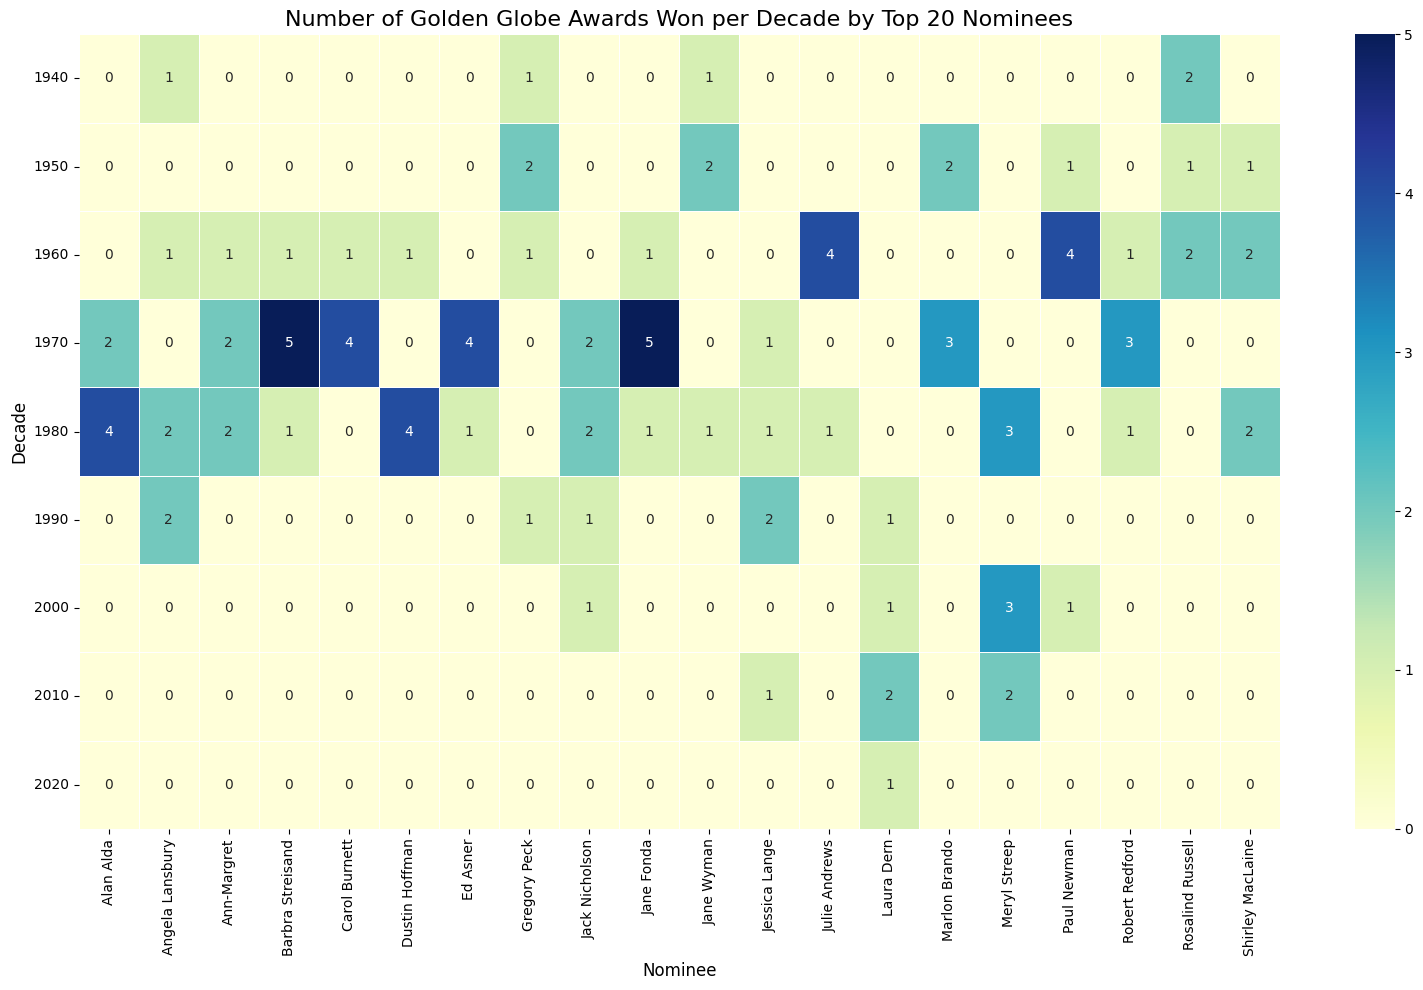

In [45]:
# Ensure 'year_award' is numeric and create 'decade' column
award_df['year_award'] = pd.to_numeric(award_df['year_award'], errors='coerce')
award_df_cleaned_years = award_df.dropna(subset=['year_award']).copy() # Create a copy
award_df_cleaned_years['decade'] = (award_df_cleaned_years['year_award'] // 10) * 10

# Filter for winning entries only
winning_awards_df = award_df_cleaned_years[award_df_cleaned_years['win'] == True].copy()

# Get the top N nominees by overall wins (e.g., top 15-20 for heatmap readability)
top_nominees = winning_awards_df['nominee'].value_counts().nlargest(20).index

# Filter winning entries to include only these top nominees
# Corrected the variable name from winning_awards_wins to winning_awards_df
df_top_nominees_wins = winning_awards_df[winning_awards_df['nominee'].isin(top_nominees)]

# Group by decade and nominee, then count the wins
nominee_decade_wins = df_top_nominees_wins.groupby(['decade', 'nominee']).size().reset_index(name='wins')

# Pivot the table for the heatmap
# Fill potential missing decade/nominee combinations with 0 wins
heatmap_data_nominee_wins = nominee_decade_wins.pivot_table(
    index='decade',
    columns='nominee',
    values='wins'
).fillna(0) # Fill NaN with 0 where a nominee had no wins in a decade

# Create the heatmap
plt.figure(figsize=(16, 10)) # Adjust size
# Change fmt='d' to fmt='g' or another appropriate float format if needed
sns.heatmap(heatmap_data_nominee_wins, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5)
plt.title('Number of Golden Globe Awards Won per Decade by Top 20 Nominees', fontsize=16)
plt.xlabel('Nominee', fontsize=12)
plt.ylabel('Decade', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
# Ensure 'year_award' and 'win' are in the correct format
award_df['year_award'] = pd.to_numeric(award_df['year_award'], errors='coerce')
award_df = award_df.dropna(subset=['year_award', 'win']) # Drop rows with missing year or win status

# Sort the DataFrame by year to process chronologically
award_df_sorted = award_df.sort_values(by='year_award')

# Create a set to store all nominees encountered so far
past_nominees = set()

# Lists to store win status for past vs. new nominees
win_status_past_nominee = []
win_status_new_nominee = []

# Iterate through each year in the sorted DataFrame
for year in award_df_sorted['year_award'].unique():
    # Get entries for the current year
    current_year_df = award_df_sorted[award_df_sorted['year_award'] == year]

    # Iterate through each entry in the current year
    for index, row in current_year_df.iterrows():
        nominee = row['nominee']
        win = row['win']

        # Check if the nominee is a past nominee (appeared in previous years)
        if nominee in past_nominees:
            win_status_past_nominee.append(win)
        else:
            win_status_new_nominee.append(win)

        # Add the current nominee to the set of past nominees for future iterations
        past_nominees.add(nominee)

# Calculate win rates
win_rate_past = (sum(win_status_past_nominee) / len(win_status_past_nominee)) * 100 if win_status_past_nominee else 0
win_rate_new = (sum(win_status_new_nominee) / len(win_status_new_nominee)) * 100 if win_status_new_nominee else 0

print(f"Win rate for nominees with previous nominations: {win_rate_past:.2f}%")
print(f"Win rate for nominees with no previous nominations: {win_rate_new:.2f}%")

Win rate for nominees with previous nominations: 21.44%
Win rate for nominees with no previous nominations: 24.04%


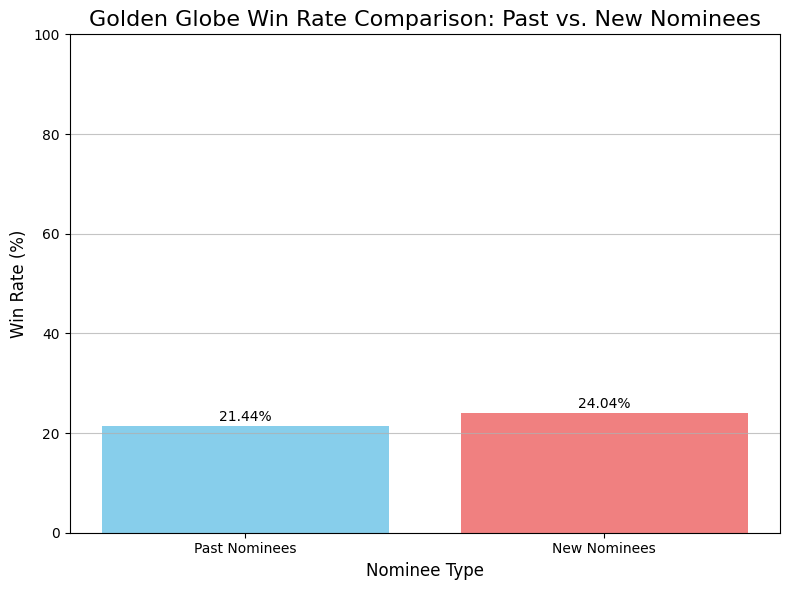

In [48]:
# Create a DataFrame for plotting
win_rates_df = pd.DataFrame({
    'Nominee Type': ['Past Nominees', 'New Nominees'],
    'Win Rate (%)': [win_rate_past, win_rate_new]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(win_rates_df['Nominee Type'], win_rates_df['Win Rate (%)'], color=['skyblue', 'lightcoral'])
plt.title('Golden Globe Win Rate Comparison: Past vs. New Nominees', fontsize=16)
plt.xlabel('Nominee Type', fontsize=12)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.ylim(0, 100) # Set y-axis limit to 0-100 for percentage
plt.grid(axis='y', alpha=0.75)

# Add the win rate values on top of the bars
for index, row in win_rates_df.iterrows():
    plt.text(index, row['Win Rate (%)'] + 1, f"{row['Win Rate (%)']:.2f}%", ha='center')

plt.tight_layout()
plt.show()

In [47]:
# 1. Identify Acting Categories
# Based on your previous code, you've already done this:
# actor_awards and actress_awards DataFrames contain acting categories

# Combine actor and actress awards for a comprehensive view of acting nominees/winners
acting_awards_df = pd.concat([actor_awards, actress_awards])

# Ensure 'win' column is boolean
acting_awards_df['win'] = acting_awards_df['win'].astype(bool)

# Count acting nominations per nominee
acting_nominations_count = acting_awards_df['nominee'].value_counts()

# Count acting wins per nominee
acting_wins_df = acting_awards_df[acting_awards_df['win'] == True]
acting_wins_count = acting_wins_df['nominee'].value_counts()

print("Top 10 Nominees in Acting Categories:")
print(acting_nominations_count.head(10))

print("\nTop 10 Winners in Acting Categories:")
print(acting_wins_count.head(10))

# 2. Identify Directing Categories
# You might need to inspect the 'category' column to find the exact directing category names.
# Common names include 'Best Director - Motion Picture'
directing_keywords = ['Director']
directing_awards_df = award_df[
    award_df['category'].str.contains('|'.join(directing_keywords), case=False, na=False)
]

# Ensure 'win' column is boolean
directing_awards_df['win'] = directing_awards_df['win'].astype(bool)

# Count directing nominations per nominee
directing_nominations_count = directing_awards_df['nominee'].value_counts()

# Count directing wins per nominee
directing_wins_df = directing_awards_df[directing_awards_df['win'] == True]
directing_wins_count = directing_wins_df['nominee'].value_counts()

print("\nTop 10 Nominees in Directing Categories:")
print(directing_nominations_count.head(10))

print("\nTop 10 Winners in Directing Categories:")
print(directing_wins_count.head(10))

Top 10 Nominees in Acting Categories:
nominee
Meryl Streep        32
Jack Lemmon         22
Shirley MacLaine    19
Al Pacino           18
Jack Nicholson      17
Jessica Lange       16
Helen Mirren        16
Carol Burnett       16
Alan Alda           15
Angela Lansbury     15
Name: count, dtype: int64

Top 10 Winners in Acting Categories:
nominee
Meryl Streep       8
Alan Alda          6
Angela Lansbury    6
Jack Nicholson     6
Carol Burnett      5
Ann-Margret        5
Jessica Lange      5
Dustin Hoffman     5
Laura Dern         5
Ed Asner           5
Name: count, dtype: int64

Top 10 Nominees in Directing Categories:
nominee
Steven Spielberg        12
Martin Scorsese          9
Fred Zinnemann           7
Clint Eastwood           7
Francis Ford Coppola     6
Sidney Lumet             6
Billy Wilder             5
Mike Nichols             5
William Wyler            5
Robert Wise              5
Name: count, dtype: int64

Top 10 Winners in Directing Categories:
nominee
Elia Kazan           

Win rate for nominees who won last year: 26.88%


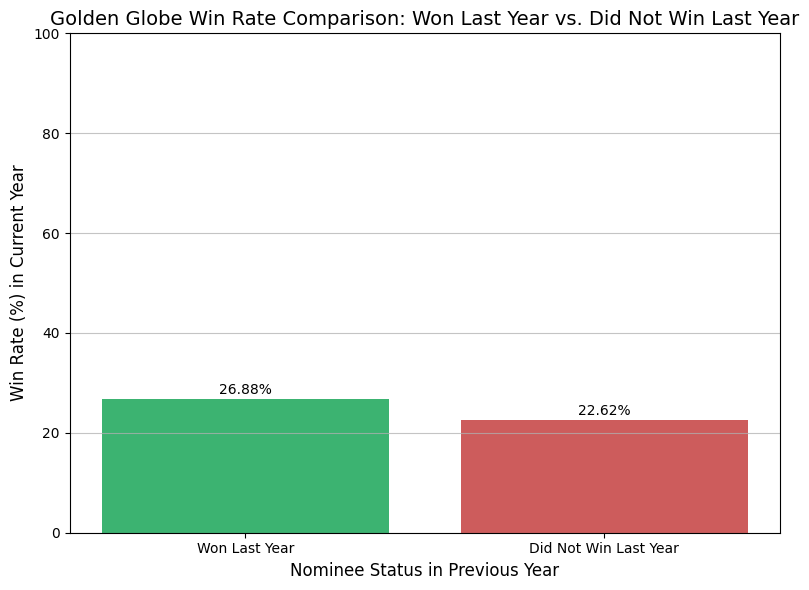

In [49]:
award_df['year_award'] = pd.to_numeric(award_df['year_award'], errors='coerce')
award_df = award_df.dropna(subset=['year_award', 'win']) # Drop rows with missing year or win status

# Sort the DataFrame by year
award_df_sorted = award_df.sort_values(by='year_award')

# Dictionary to store winners from the previous year
previous_year_winners = {}

# Lists to store win status for nominees who won last year vs. others
win_status_won_last_year = []
win_status_did_not_win_last_year = []

# Iterate through each year in the sorted DataFrame
for year in award_df_sorted['year_award'].unique():
    # Get entries for the current year
    current_year_df = award_df_sorted[award_df_sorted['year_award'] == year]

    # Get entries for the previous year
    previous_year = year - 1
    previous_year_df = award_df_sorted[award_df_sorted['year_award'] == previous_year]

    # Identify winners in the previous year
    previous_winners = set(previous_year_df[previous_year_df['win'] == True]['nominee'].unique())

    # Iterate through each entry in the current year
    for index, row in current_year_df.iterrows():
        nominee = row['nominee']
        win = row['win']

        # Check if the current nominee won in the previous year
        if nominee in previous_winners:
            win_status_won_last_year.append(win)
        else:
            # This includes nominees who were nominated but didn't win last year,
            # and nominees who were not nominated at all last year.
            win_status_did_not_win_last_year.append(win)

# Calculate win rates
win_rate_won_last_year = (sum(win_status_won_last_year) / len(win_status_won_last_year)) * 100 if win_status_won_last_year else 0
win_rate_did_not_win_last_year = (sum(win_status_did_not_win_last_year) / len(win_status_did_not_win_last_year)) * 100 if win_status_did_not_win_last_year else 0

print(f"Win rate for nominees who won last year: {win_rate_won_last_year:.2f}%")
# Create a DataFrame for plotting
win_rates_last_year_df = pd.DataFrame({
    'Nominee Status': ['Won Last Year', 'Did Not Win Last Year'],
    'Win Rate (%)': [win_rate_won_last_year, win_rate_did_not_win_last_year]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(win_rates_last_year_df['Nominee Status'], win_rates_last_year_df['Win Rate (%)'], color=['mediumseagreen', 'indianred'])
plt.title('Golden Globe Win Rate Comparison: Won Last Year vs. Did Not Win Last Year', fontsize=14)
plt.xlabel('Nominee Status in Previous Year', fontsize=12)
plt.ylabel('Win Rate (%) in Current Year', fontsize=12)
plt.ylim(0, 100) # Set y-axis limit to 0-100 for percentage
plt.grid(axis='y', alpha=0.75)

# Add the win rate values on top of the bars
for index, row in win_rates_last_year_df.iterrows():
    plt.text(index, row['Win Rate (%)'] + 1, f"{row['Win Rate (%)']:.2f}%", ha='center')

plt.tight_layout()
plt.show()

In [50]:
print(f"Win rate for nominees with previous nominations: {win_rate_past:.2f}%")
print(f"Win rate for nominees with no previous nominations: {win_rate_new:.2f}%")

Win rate for nominees with previous nominations: 21.44%
Win rate for nominees with no previous nominations: 24.04%


These plots help address the goals: the first identifies top recurring winners, and the second explores shifts in category dominance (specifically Film vs. TV) and potential systemic bias in win rates between these two major media types over time.

 Uncovering Trends and Patterns in the Golden Globe Awards (1944-2020)

This exploratory data analysis of the Golden Globe Awards dataset from 1944 to 2020 aimed to examine historical trends, identify recurring winners, analyze shifts in recognition across categories and mediums, and investigate potential systemic biases in award selections. Through data cleaning, visualization, and initial statistical comparisons, several key insights have been revealed.

The analysis confirmed significant historical trends in the volume of awards presented, showing a period of expansion followed by stabilization from the 1980s onward. A central finding is the clear historical dominance of Film categories in terms of receiving a higher volume of nominations compared to Television throughout much of the awards' history. While television representation has grown significantly, this imbalance in opportunity for nomination is a notable pattern.

Regarding win probabilities, while initial statistical tests comparing the overall win rate between broad Film and Television categories did not indicate a consistent, statistically significant bias across the entire dataset, deeper analysis at the category level revealed historical disparities and non-uniform growth in TV recognition. This suggests that the story of Film vs. TV recognition is more complex than a simple overall win rate comparison might indicate.

Furthermore, the analysis strongly suggests that a nominee's history with the Golden Globes is associated with future success. Nominees with prior nominations demonstrated a higher win rate, and those who won in the preceding year showed an even greater likelihood of winning again. This highlights the potential influence of prior recognition and momentum in the award selection process. The identification of recurring winners further underscores that certain individuals have been consistently recognized over multiple decades.

In summary, the Golden Globe Awards dataset provides a rich history of recognition trends. While Film has historically received more nomination opportunities, the picture of win probability is more nuanced. The analysis points to the importance of prior recognition in increasing the likelihood of a win and highlights historical disparities at the category level. These findings emphasize the complex interplay of factors, beyond the quality of the work alone, that likely influence the Golden Globe Award outcomes. Future research could delve deeper into specific category trends, analyze the voting body's composition and changes over time, or employ more advanced modeling techniques to isolate the impact of various factors on award selections.

In summary, the Golden Globe Awards dataset provides a rich history of recognition trends. While Film has historically received more nomination opportunities, the picture of win probability is more nuanced. The analysis points to the importance of prior recognition in increasing the likelihood of a win and highlights historical disparities at the category level. These findings emphasize the complex interplay of factors, beyond the quality of the work alone, that likely influence the Golden Globe Award outcomes. Future research could delve deeper into specific category trends, analyze the voting body's composition and changes over time, or employ more advanced modeling techniques to isolate the impact of various factors on award selections.



Citation:
- Golden Globe Awards. (2025). Golden Globe Trophy [Image]. Def Pen. https://defpen.com/2025-golden-globe-awards-winners-list/
- Unanimad. (n.d.). Golden Globe Awards [Dataset]. Kaggle. https://www.kaggle.com/datasets/unanimad/golden-globe-awards
